In [34]:
import numpy as np
import random

import pandas as pd

%matplotlib inline

In [136]:
# 報酬行列
R = np.array([
    [0, 1],
    [-1, 1],
    [5, -10],
    [0, 0]
    ])

# Q値
Q = np.zeros((4, 2))

# 割引率
Gamma = 0.8

# 初期状態
state = 0

# エピソード
episode = 1

# 状態遷移関数
def shiftState(state, action):
    if state is 0:
        if action == 0:
            return 2
        return 1
    elif state is 1:
        if action == 0:
            return 0
        return 3
    elif state is 2:
        if action == 0:
            return 3
        return 0
    else:
        return

# t+1のアクションのうち最大のQ値を取得
def fetchMaxQvalueOfNextState(next_state, action_menu):
    return max([Q[next_state][i] for i in action_menu])

res = []
Q_val = {}
# Q学習
def learnQ(R, Q, Gamma, state, episode):
    
    while episode <= 10:
        # print("episode is %d" %episode)
        # print("state is %d" % state)
        action_menu = [0, 1]
        action = random.choice(action_menu)
        # print("action is %d" %action)
        next_state = shiftState(state, action)
        # print("next state is %d" %next_state)
        max_Q_next_sa = fetchMaxQvalueOfNextState(next_state, action_menu)
        Q[state, action] = R[state, action] + Gamma * max_Q_next_sa
        Q_val["state{}_action{}".format(state, action)] = Q[state, action]
        
        part_res = {"episode":episode}
        part_res.update(Q_val)
        res.append(part_res)

        # print(Q)

        state = next_state

        if next_state is 3:
            episode = episode + 1
            state = 0

In [137]:
learnQ(R, Q, Gamma, state, episode)

In [138]:
a = pd.DataFrame(res)

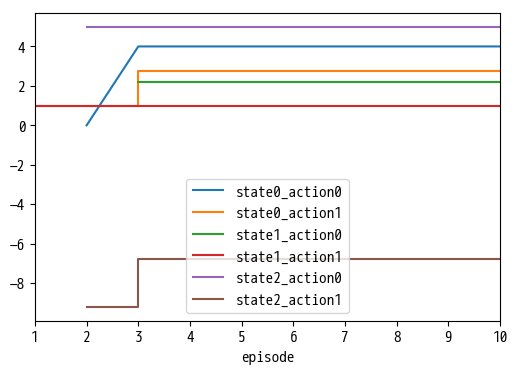

In [139]:
a.plot(x="episode")